# Análisis Exploratorio de Datos - Telecomunicaciones a Nivel Nacional

Importa las bibliotecas necesarias:

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import seaborn as sns
import os
import warnings
import requests


2 Carga cada dataset a analizar

In [544]:
dataset1 = pd.read_csv('dataset/1_Penetración de Internet fijo (accesos por cada 100 hogares).csv')
dataset3 = pd.read_csv('dataset/3_Internet_banda ancha y banda angosta.csv')
dataset5 = pd.read_csv('dataset/5_Serie trimestral de accesos a Internet fijo por tecnología.csv')
dataset6 = pd.read_csv('dataset/6_Acceso a Internet fijo por tecnología y provincia.csv')
dataset10 = pd.read_csv('dataset/10_Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv')
dataset12 = pd.read_csv('dataset/12_Ingresos trimestrales por la prestación del servicio de Internet fijo.csv')
dataset15 = pd.read_csv('dataset/15_Listado de localidades con conectividad a internet..csv')



Es un placer estar aquí hoy para presentarles los resultados de nuestro Análisis Exploratorio de Datos (EDA, por sus siglas en inglés). En este estudio, nos hemos enfocado en examinar la adopción de Internet fijo a nivel nacional, y hemos recopilado una amplia gama de datos para comprender mejor este fenómeno y extraer conclusiones significativas. 😃🔍

Durante nuestro EDA, nos hemos centrado en 6 aspectos clave que nos permiten obtener una visión integral de la situación. A través de gráficos y análisis de datos, hemos explorado cada uno de estos puntos para descubrir tendencias, comparaciones y patrones que pueden ayudarnos a entender mejor la adopción de Internet fijo en nuestro país. 📊🌐

Los 6 puntos principales que hemos analizado son:

## 1 Internet fijo a nivel nacional:

Análisis de Alcance de Internet fijo por cada 100 hogares a lo largo del tiempo

In [ ]:
# Verificar y convertir el formato de los datos si es necesario
dataset1['Año'] = dataset1['Año'].astype(int)
dataset1['Accesos por cada 100 hogares'] = dataset1['Accesos por cada 100 hogares'].str.replace(',', '').astype(float)

# Ordenar los datos por el eje x (columna 'Año')
dataset1 = dataset1.sort_values(by='Año')
dataset1

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
839,2014,1,Tucumán,3342.0
769,2014,3,Capital Federal,1138.0
770,2014,3,Catamarca,2471.0
771,2014,3,Chaco,2111.0
772,2014,3,Chubut,406.0
...,...,...,...,...
50,2022,1,Catamarca,5821.0
51,2022,1,Chaco,4406.0
52,2022,1,Chubut,8805.0
36,2022,2,Mendoza,4939.0


### Alcance de Internet fijo a nivel nacional - Mapa de calor

Visualizamos de manera gráfica y geoespacial el alcance del Internet fijo a nivel nacional en Argentina. El mapa de calor proporciona una representación visual rápida y efectiva de la variabilidad en el alcance de Internet en diferentes regiones del país. Permite identificar patrones, tendencias en el de Internet fijo. Esta información puede ser útil para la planificación y toma de decisiones en políticas públicas, inversiones en infraestructura de telecomunicaciones y desarrollo de servicios digitales. Además, el uso de un mapa de calor permite una fácil interpretación de los datos por parte de los usuarios, ya que los colores indican niveles relativos de Alcance de Internet fijo en cada región.

In [ ]:
# Ruta al archivo shapefile principal
shapefile_path = 'argentina_shapefile.shp'

# Cargar el archivo shapefile en un GeoDataFrame
gdataset15_argentina = gpd.read_file(shapefile_path)

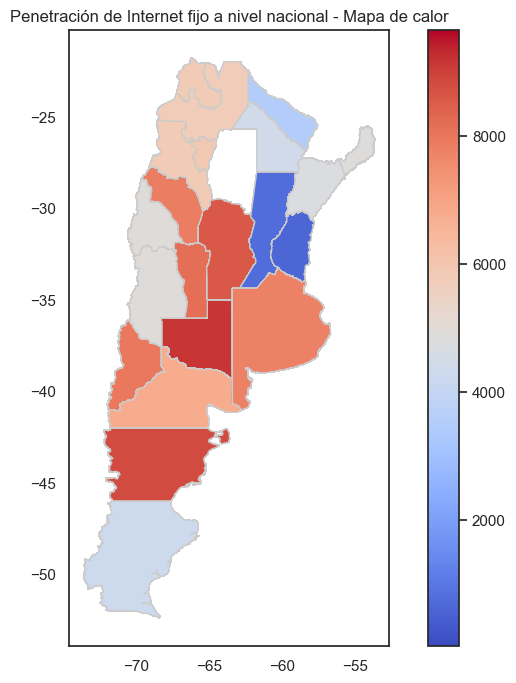

In [ ]:
# Fusionar los datos del GeoDataFrame con los datos del DataFrame
gdataset15_merged = gdataset15_argentina.merge(dataset1, left_on='NAM', right_on='Provincia')

# Configurar el mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
cmap = 'coolwarm'  
gdataset15_merged.plot(column='Accesos por cada 100 hogares', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Alcance de Internet fijo a nivel nacional - Mapa de calor')

plt.show()


Hemos trazado una gráfica de línea que muestra la evolución de la conexión de Internet fijo a lo largo del tiempo. Esta visualización nos permite identificar las tendencias generales de crecimiento o declive y analizar los posibles factores que influyen en ellas. 📈

Observando los datos, se puede observar una tendencia general a lo largo del tiempo. A medida que avanzamos de los trimestres más antiguos a los más recientes, los valores tienden a aumentar gradualmente. Sería necesario contar con mas datos completos para realizar un análisis más preciso de la evolución o tendencia de los datos a lo largo del tiempo.

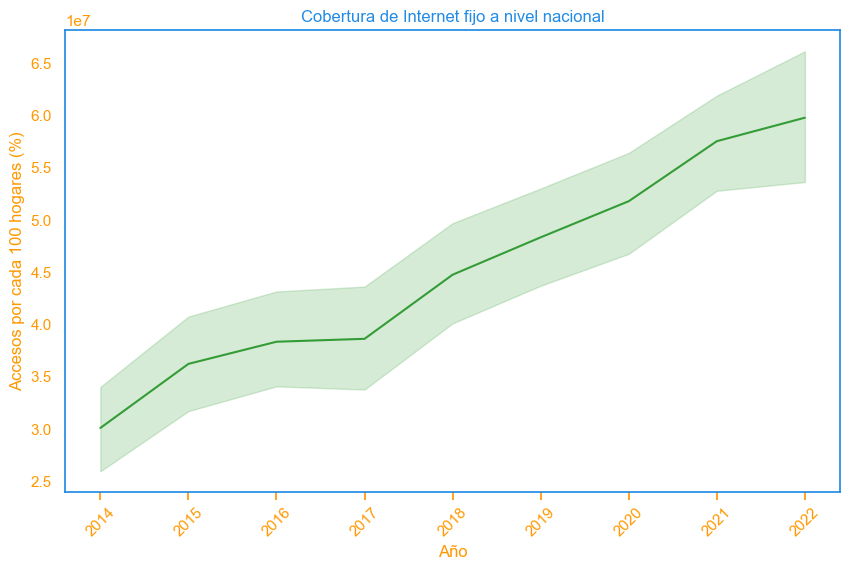

In [ ]:
# Grafica con sus colores de cobertura de internet fijo a nivel nacional
colors = ['#349C36', '#FF9800', '#228BE5']

e
dataset1['Accesos por cada 100 hogares'] = dataset1['Accesos por cada 100 hogares'] * 100


dataset1['Accesos por cada 100 hogares'] = dataset1['Accesos por cada 100 hogares'].round(2)


plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset1, x='Año', y='Accesos por cada 100 hogares', color=colors[0])


plt.title('Cobertura de Internet fijo a nivel nacional', color=colors[2])
plt.xlabel('Año', color=colors[1])
plt.ylabel('Accesos por cada 100 hogares (%)', color=colors[1])
plt.xticks(rotation=45, color=colors[1])
plt.yticks(color=colors[1])

plt.gca().xaxis.set_ticks_position('bottom')

ax = plt.gca()
ax.spines['bottom'].set_color(colors[2])
ax.spines['top'].set_color(colors[2])
ax.spines['left'].set_color(colors[2])
ax.spines['right'].set_color(colors[2])
ax.tick_params(axis='x', colors=colors[1])
ax.tick_params(axis='y', colors=colors[1])
ax.yaxis.label.set_color(colors[1])
ax.xaxis.label.set_color(colors[1])
ax.title.set_color(colors[2])
ax.patch.set_facecolor('white')

plt.show()

El Alcance de Internet fijo a nivel nacional ha experimentado una evolución a lo largo del tiempo, y se han identificado cinco ciudades con mayor tendencia en Argentina: Capital Federal, Chubut, Córdoba, La Pampa y Tierra del Fuego.

En el año 2016, el Alcance de Internet fijo en Argentina variaba entre el 9,63% y el 120,77% por cada 100 hogares, dependiendo de la provincia. Desde entonces, se ha observado un aumento general en el Alcance de Internet fijo en todo el país.

En particular, en el año 2022 se ha registrado un crecimiento significativo en el Alcance de Internet fijo en comparación con 2016. Por ejemplo, en la provincia de Buenos Aires, el Alcance aumentó de 60,14% en 2016 a 78,11% en el tercer trimestre de 2022. En la Capital Federal, el Alcance también experimentó un incremento, pasando de 120,77% en 2016 a 122,28% en el tercer trimestre de 2022.

Estos datos indican un crecimiento generalizado en el Alcance de Internet fijo a nivel nacional, con algunas provincias experimentando un crecimiento más destacado. Este análisis nos permite identificar las tendencias de crecimiento y comprender los factores que pueden influir en ellas, como el desarrollo de infraestructura de telecomunicaciones y las políticas de conectividad implementadas.

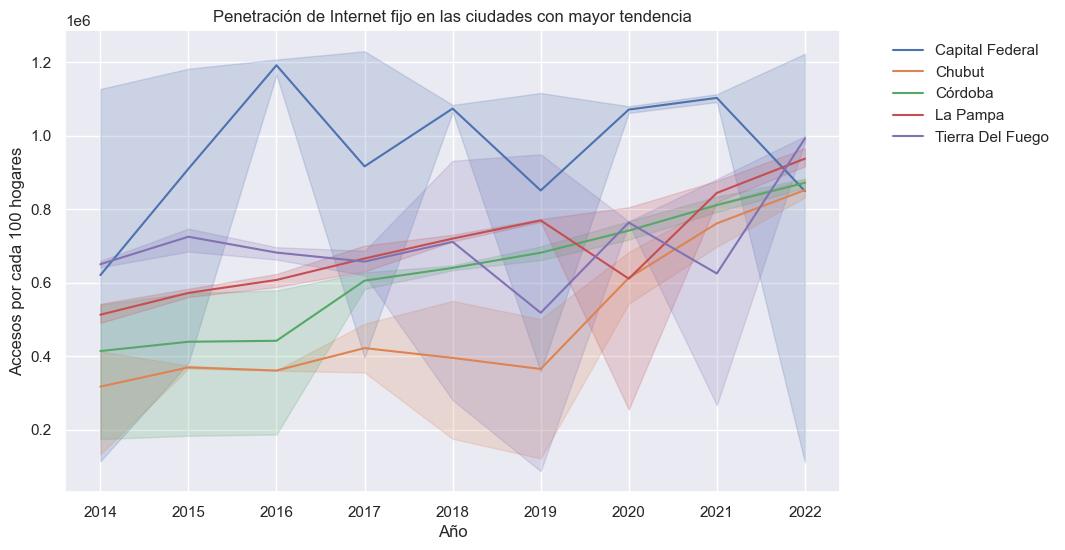

In [ ]:
# Grafica Filtrar las ciudades con mayor tendencia
top_cities = dataset1.groupby('Provincia')['Accesos por cada 100 hogares'].max().nlargest(5).index
filtered_dataset = dataset1[dataset1['Provincia'].isin(top_cities)]

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_dataset, x='Año', y='Accesos por cada 100 hogares', hue='Provincia')
plt.title('Alcance de Internet fijo en las ciudades con mayor tendencia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.show()

## 2 Total nacional de accesos a Internet fijo por banda ancha y banda angosta

Limpieza de los datos

In [316]:
# Verificar si existen valores faltantes, ver si existen valores faltanmte o duplicados y eliminar
dataset3.isnull().sum()
dataset3.duplicated().sum()
dataset3 = dataset3.dropna()
dataset3 = dataset3.drop_duplicates()


Conversion de los datos 

In [337]:
# Convertir las columnas a tipo string,  Eliminar caracteres no numéricos y reemplazar, Ordenar datos por columna y año
dataset3['Banda ancha fija'] = dataset3['Banda ancha fija'].astype(str)
dataset3['Dial up'] = dataset3['Dial up'].astype(str)
dataset3['Total'] = dataset3['Total'].astype(str)
dataset3['Banda ancha fija'] = dataset3['Banda ancha fija'].str.replace('.', '').str.replace(',', '.')
dataset3['Dial up'] = dataset3['Dial up'].str.replace('.', '').str.replace(',', '.')
dataset3['Total'] = dataset3['Total'].str.replace('.', '').str.replace(',', '.')
numeric_columns = ['Banda ancha fija', 'Dial up', 'Total']
dataset3[numeric_columns] = dataset3[numeric_columns].apply(pd.to_numeric)
dataset3 = dataset3.sort_values('Año')

El presente estudio analiza la evolución de las suscripciones de banda ancha fija y dial up a lo largo de los años.

El objetivo de estas gráficas es mostrar la proporción de accesos de Banda ancha fija y Dial up a lo largo del tiempo. Se calcula la proporción dividiendo la suma de los accesos de Banda ancha fija entre la suma de los accesos de Dial up para cada año. Esta visualización permite observar la tendencia de la proporción y comprender los cambios en la adopción de estas tecnologías a lo largo de los años.

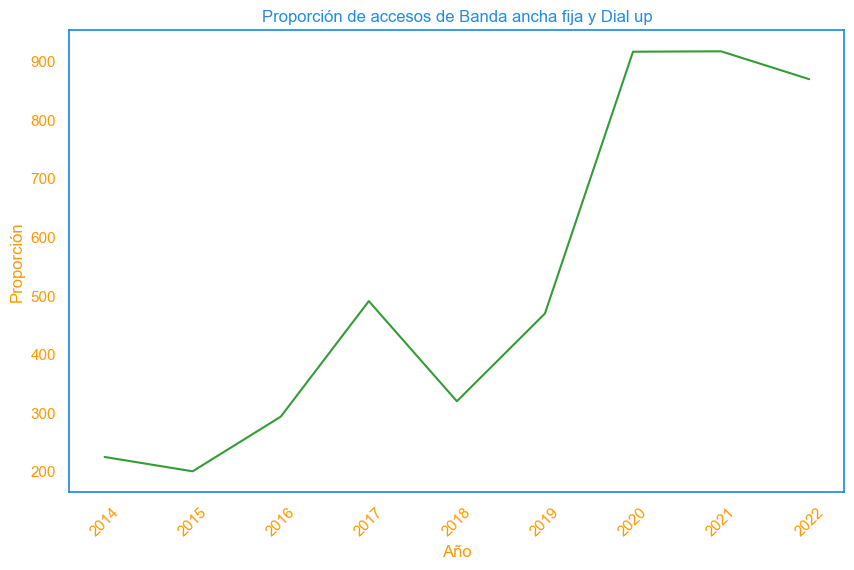

In [322]:
# Gráfico de línea de la proporción de accesos de banda ancha fija y Dial up
access_ratio = dataset3.groupby('Año').apply(lambda x: x['Banda ancha fija'].sum() / x['Dial up'].sum())
plt.figure(figsize=(10, 6))
plt.plot(access_ratio.index, access_ratio.values, color=colors[0])
plt.title('Proporción de accesos de Banda ancha fija y Dial up', color=colors[2])
plt.xlabel('Año', color=colors[1])
plt.ylabel('Proporción', color=colors[1])
plt.xticks(rotation=45, color=colors[1])
plt.yticks(color=colors[1])
ax = plt.gca()
ax.spines['bottom'].set_color(colors[2])
ax.spines['top'].set_color(colors[2])
ax.spines['left'].set_color(colors[2])
ax.spines['right'].set_color(colors[2])
ax.tick_params(axis='x', colors=colors[1])
ax.tick_params(axis='y', colors=colors[1])
ax.yaxis.label.set_color(colors[1])
ax.xaxis.label.set_color(colors[1])
ax.title.set_color(colors[2])
ax.patch.set_facecolor('white')

plt.show()



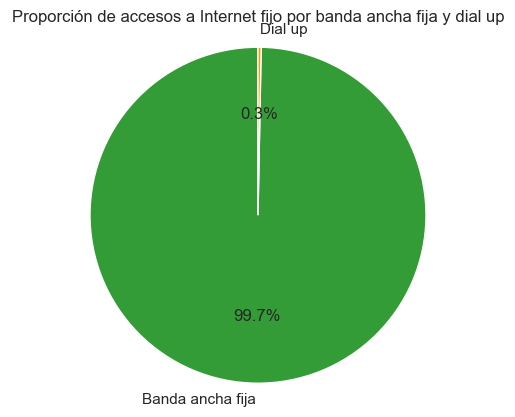

In [335]:
import matplotlib.pyplot as plt

# Calcular la proporción de accesos por cada tipo de acceso en cada trimestre
dataset3['Proporcion_banda_ancha'] = dataset3['Banda ancha fija'] / dataset3['Total']
dataset3['Proporcion_dial_up'] = dataset3['Dial up'] / dataset3['Total']
dataset3['Proporcion_banda_ancha_pct'] = dataset3['Proporcion_banda_ancha'] * 100
dataset3['Proporcion_dial_up_pct'] = dataset3['Proporcion_dial_up'] * 100
proporcion_trimestral = dataset3.groupby('Trimestre')[['Proporcion_banda_ancha_pct', 'Proporcion_dial_up_pct']].sum()
labels = ['Banda ancha fija', 'Dial up']
colors = ['#349C36', '#FF9800']
plt.pie(proporcion_trimestral.iloc[-1], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Personalizar la gráfica
plt.title('Proporción de accesos a Internet fijo por banda ancha fija y dial up')
plt.axis('equal')

plt.show()

 Se observa claramente un aumento constante en el número de suscripciones de banda ancha fija, alcanzando un total de 11.091.128 en el tercer trimestre de 2022. Por otro lado, las suscripciones de dial up han experimentado una disminución significativa, llegando a solo 12.437 en el mismo período. Estos resultados indican una clara preferencia de los usuarios por la banda ancha fija como método de acceso a Internet.

## 3 Análisis de la evolución de las conexiones de internet en Argentina: 2014-2022

Limpieza de los datos

In [350]:
# Verificar si existen valores faltantes, ver si existen valores faltanmte o duplicados y eliminar
dataset5.isnull().sum()
dataset5.duplicated().sum()
dataset5 = dataset5.dropna()
dataset5 = dataset5.drop_duplicates()

Conversion de los datos 

In [352]:
# Convertir las columnas a tipo string, Convertir las columnas a tipo numérico, ordenar datos por periodo
dataset5['ADSL'] = dataset5['ADSL'].astype(str)
dataset5['Cablemodem'] = dataset5['Cablemodem'].astype(str)
dataset5['Fibra óptica'] = dataset5['Fibra óptica'].astype(str)
dataset5['Wireless'] = dataset5['Wireless'].astype(str)
dataset5['Otros'] = dataset5['Otros'].astype(str)
dataset5['Total'] = dataset5['Total'].astype(str)
dataset5['ADSL'] = dataset5['ADSL'].str.replace('.', '').str.replace(',', '.')
dataset5['Cablemodem'] = dataset5['Cablemodem'].str.replace('.', '').str.replace(',', '.')
dataset5['Fibra óptica'] = dataset5['Fibra óptica'].str.replace('.', '').str.replace(',', '.')
dataset5['Wireless'] = dataset5['Wireless'].str.replace('.', '').str.replace(',', '.')
dataset5['Otros'] = dataset5['Otros'].str.replace('.', '').str.replace(',', '.')
dataset5['Total'] = dataset5['Total'].str.replace('.', '').str.replace(',', '.')
numeric_columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
dataset5[numeric_columns] = dataset5[numeric_columns].apply(pd.to_numeric)
dataset5 = dataset5.sort_values('Periodo')

Este estudio analiza la evolución de las conexiones de internet en Argentina desde 2014 hasta 2022. Se presentan datos trimestrales sobre el número de conexiones de diferentes tipos, como ADSL, cablemódem, fibra óptica, wireless y otros. Además, se muestra el total de conexiones en cada trimestre. El objetivo es proporcionar una visión general de cómo ha cambiado el panorama de las conexiones de internet en Argentina a lo largo del tiempo. Estos datos son relevantes para comprender las tendencias y patrones en el uso de internet en el país, así como para identificar oportunidades de negocio en el sector de las telecomunicaciones.

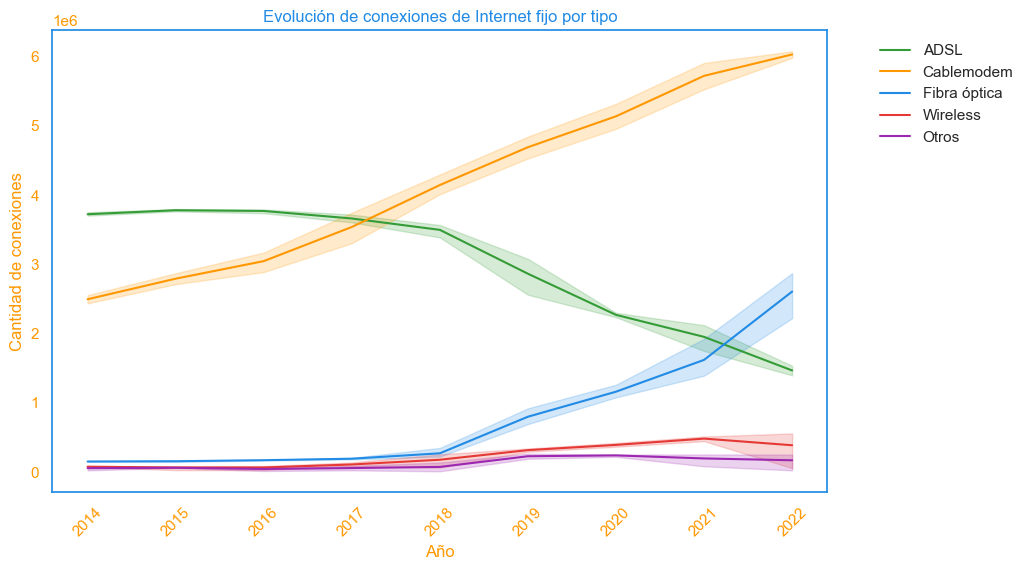

In [355]:
# Grafica evolucion de conexiones a internet
colors = ['#349C36', '#FF9800', '#228BE5', '#E53935', '#9C27B0']

plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset5, x='Año', y='ADSL', color=colors[0], label='ADSL')
sns.lineplot(data=dataset5, x='Año', y='Cablemodem', color=colors[1], label='Cablemodem')
sns.lineplot(data=dataset5, x='Año', y='Fibra óptica', color=colors[2], label='Fibra óptica')
sns.lineplot(data=dataset5, x='Año', y='Wireless', color=colors[3], label='Wireless')
sns.lineplot(data=dataset5, x='Año', y='Otros', color=colors[4], label='Otros')
plt.title('Evolución de conexiones de Internet fijo por tipo', color=colors[2])
plt.xlabel('Año', color=colors[1])
plt.ylabel('Cantidad de conexiones', color=colors[1])
plt.xticks(rotation=45, color=colors[1])
plt.yticks(color=colors[1])

ax = plt.gca()
ax.spines['bottom'].set_color(colors[2])
ax.spines['top'].set_color(colors[2])
ax.spines['left'].set_color(colors[2])
ax.spines['right'].set_color(colors[2])
ax.tick_params(axis='x', colors=colors[1])
ax.tick_params(axis='y', colors=colors[1])
ax.yaxis.label.set_color(colors[1])
ax.xaxis.label.set_color(colors[1])
ax.title.set_color(colors[2])
ax.patch.set_facecolor('white')

# Mostrar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


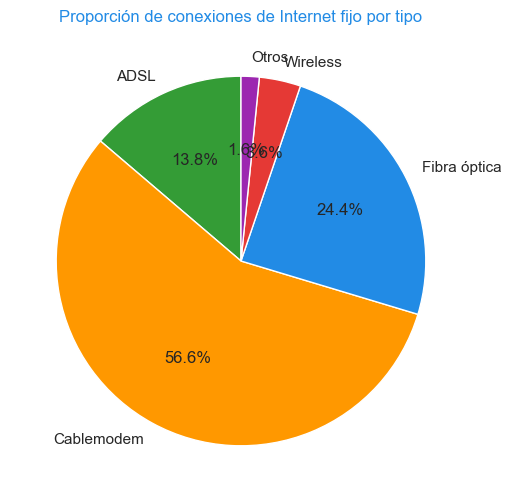

In [356]:
# Proporcion de conexiones de internet fijo por tipo
last_year_data = dataset5[dataset5['Año'] == dataset5['Año'].max()]
connection_counts = last_year_data[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

labels = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
colors = ['#349C36', '#FF9800', '#228BE5', '#E53935', '#9C27B0']

plt.figure(figsize=(8, 6))
plt.pie(connection_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Proporción de conexiones de Internet fijo por tipo', color=colors[2])

# Mostrar gráfico
plt.show()


se recomienda a los operadores de servicios enfocarse en la expansión y mejora de las conexiones de fibra óptica. Los datos muestran un aumento significativo en el número de conexiones de fibra óptica a lo largo de los años, lo que indica una creciente demanda por parte de los usuarios. Al ofrecer velocidades más altas y una mayor estabilidad de conexión, la fibra óptica se posiciona como una tecnología clave para satisfacer las necesidades actuales y futuras de los usuarios de internet en Argentina. Además, se sugiere monitorear de cerca las tendencias en los ingresos trimestrales y buscar posibles correlaciones con los cambios en las preferencias de conexión de los usuarios. Esto permitirá a los operadores adaptar sus estrategias comerciales y aprovechar las oportunidades de crecimiento en el mercado de servicios de internet fijo en Argentina.

In [470]:
# Verificar si existen valores faltantes, ver si existen valores faltanmte o duplicados y eliminar
dataset6.isnull().sum()

dataset6.duplicated().sum()

dataset6 = dataset6.dropna()
dataset6 = dataset6.drop_duplicates()

columns_to_clean = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
dataset6[columns_to_clean] = dataset6[columns_to_clean].replace({'\.': '', ',': ''}, regex=True)

In [471]:
# Rellenar los valores faltantes en 'Fibra óptica' con ceros
dataset6['Fibra óptica'] = dataset6['Fibra óptica'].fillna(0)

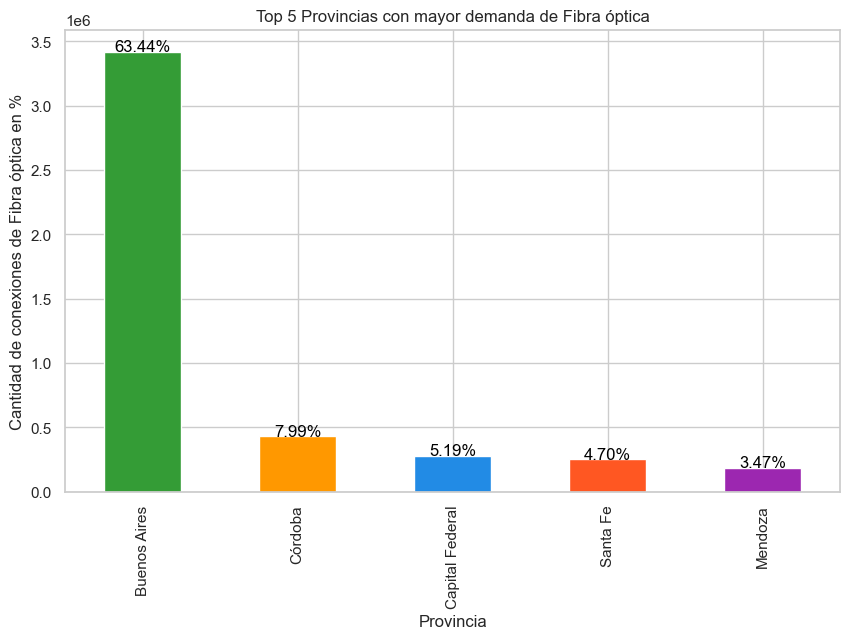

In [481]:
# Top 5 provincia con mayor demanda de fibra optica
dataset6['Fibra óptica'] = pd.to_numeric(dataset6['Fibra óptica'], errors='coerce')


last_trimester_data = dataset6[dataset6['Trimestre'] == dataset6['Trimestre'].max()]
fiber_optic_counts = last_trimester_data.groupby('Provincia')['Fibra óptica'].sum()
top_5_provinces = fiber_optic_counts.nlargest(5)
total_fiber_optic = fiber_optic_counts.sum()
percentages = (top_5_provinces / total_fiber_optic) * 100
plt.figure(figsize=(10, 6))
top_5_provinces.plot(kind='bar', color=['#349C36', '#FF9800', '#228BE5', '#FF5722', '#9C27B0'])
plt.title('Top 5 Provincias con mayor demanda de Fibra óptica')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones de Fibra óptica en %')
for i, percentage in enumerate(percentages):
    plt.text(i, top_5_provinces[i] + 1000, f'{percentage:.2f}%', ha='center', color='black')

# Mostrar gráfico
plt.show()




Se identificó que las provincias con mayor demanda de fibra óptica son Buenos Aires con un 63.44%, Córdoba con un 7.99%, Capital Federal con un 5.19%, Santa Fe con un 4.70% y Mendoza con un 3.47%.

Si se tiene presencia de fibra óptica en estas ciudades con alta demanda, se espera que se generen mayores ingresos. La fibra óptica ofrece velocidades más altas y una mayor estabilidad de conexión, lo que atrae a los usuarios que buscan una experiencia de internet de alta calidad. Al proporcionar este servicio en estas ciudades, se puede captar a un mayor número de clientes y aumentar la base de usuarios, lo que se traduce en un incremento en los ingresos.

Además, la presencia de fibra óptica en estas ciudades también brinda beneficios adicionales. Por un lado, mejora la competitividad de los proveedores de servicios de internet, ya que ofrecen una tecnología más avanzada y atractiva para los usuarios. Por otro lado, contribuye al desarrollo económico y tecnológico de estas ciudades, al proporcionar una infraestructura de comunicaciones de alta calidad que impulsa la innovación y el crecimiento empresarial.

En resumen, si se cuenta con presencia de fibra óptica en las ciudades con mayor demanda, se puede esperar un aumento en los ingresos y obtener beneficios adicionales como una mayor competitividad y desarrollo económico.

## 4 Análisis de la distribución de accesos a Internet fijo por velocidad provincias de Argentina

Este análisis examina la distribución de los accesos a Internet fijo en diferentes provincias de Argentina según la velocidad de bajada. Utilizando datos proporcionados, se identificaron las provincias con mayor consumo de velocidad, siendo Buenos Aires, Capital Federal, Concordia, Santa Fe y Entre Ríos las cinco provincias destacadas. Aunque no se proporciona información específica sobre las ciudades dentro de cada provincia, este análisis permite comprender las tendencias generales de consumo de velocidad en estas regiones. Estos hallazgos son valiosos para los proveedores de servicios de Internet, ya que les permiten adaptar sus ofertas y mejorar la calidad de sus servicios en estas provincias con mayor demanda de velocidad.

In [489]:
# Eliminar caracteres no numéricos de la columna 'Total' y convertir a tipo float
dataset10['Total'] = dataset10['Total'].str.replace('.', '').str.replace(',', '').astype(float)
dataset10 = dataset10.sort_values(by='Año')

In [491]:
# Ruta al archivo shapefile principal
shapefile_path = 'argentina_shapefile.shp'
gdataset15_argentina = gpd.read_file(shapefile_path)


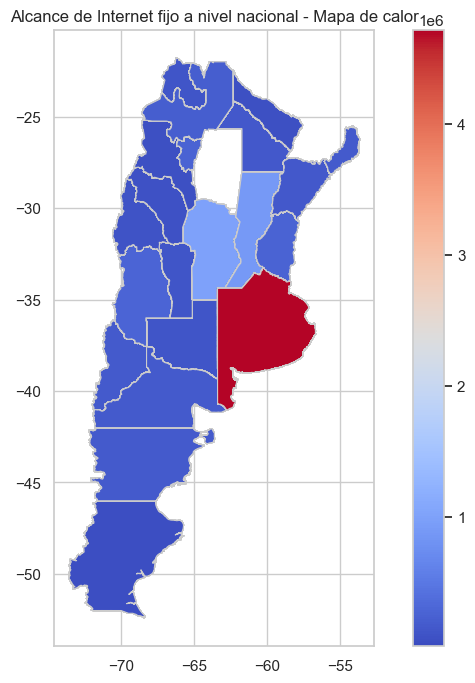

In [492]:
# Fusionar los datos del GeoDataFrame con los datos del DataFrame
gdataset15_merged = gdataset15_argentina.merge(dataset10, left_on='NAM', right_on='Provincia')

fig, ax = plt.subplots(figsize=(10, 8))
cmap = 'coolwarm' 
gdataset15_merged.plot(column='Total', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Alcance de Internet fijo a nivel nacional - Mapa de calor')

# Mostrar el mapa de calor
plt.show()


Top 5 de provincias con mayor consumo de velocidad

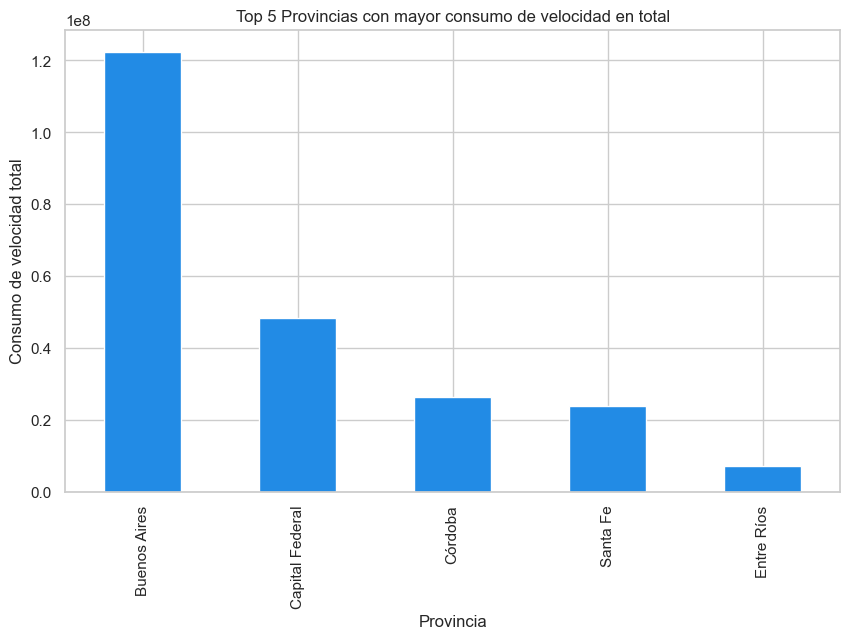

In [506]:
# Obtener las 5 provincias con mayor consumo de velocidad en total
top_5_provinces = dataset10.groupby('Provincia')['Total'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_provinces.plot(kind='bar', color='#228BE5')

plt.title('Top 5 Provincias con mayor consumo de velocidad en total')
plt.xlabel('Provincia')
plt.ylabel('Consumo de velocidad total')

# Mostrar gráfico
plt.show()


El análisis de la distribución de accesos por velocidad de bajada en provincias de Argentina revela las provincias con mayor consumo de velocidad, lo que proporciona información clave para los proveedores de servicios de Internet. Al identificar las provincias con mayor demanda de velocidad, los proveedores pueden enfocar sus esfuerzos en mejorar la infraestructura y ofrecer planes que satisfagan las necesidades de los usuarios en estas regiones. Esto les permitirá aprovechar las oportunidades de mercado y evitar debilidades al proporcionar servicios de Internet fijo de alta calidad en las provincias con mayor consumo de velocidad.

# 5 Análisis de los ingresos anuales: Destacando el año 2022 como el de mayor ingreso

En este análisis, examinaremos los ingresos anuales y destacaremos el año 2022 como el de mayor ingreso. Utilizando datos recopilados a lo largo de varios años, exploraremos la tendencia de los ingresos y proporcionaremos una visión general de cómo ha evolucionado a lo largo del tiempo.

Al analizar los datos de ingresos anuales, se observa que el año 2022 se destaca como el de mayor ingreso. Durante ese año, se registró un aumento significativo en los ingresos en comparación con los años anteriores. Este aumento puede atribuirse a varios factores, como el crecimiento económico, la implementación de estrategias efectivas de ventas o el lanzamiento exitoso de nuevos productos o servicios. 

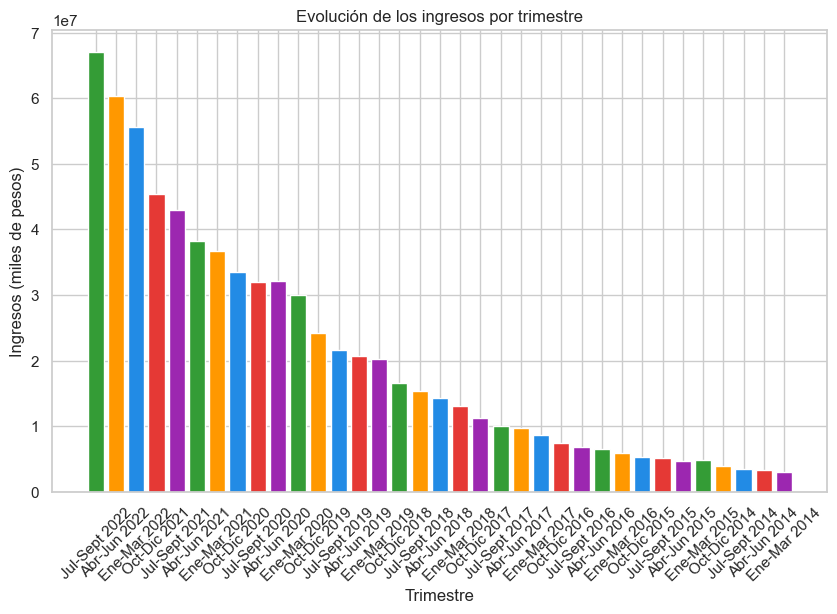

In [528]:
# Convertir los valores de la columna "Ingresos (miles de pesos)" a formato numérico
dataset12['Ingresos (miles de pesos)'] = dataset12['Ingresos (miles de pesos)'].str.replace('.', '').astype(float)
colors = ['#349C36', '#FF9800', '#228BE5', '#E53935', '#9C27B0']

plt.figure(figsize=(10, 6))
plt.bar(dataset12['Periodo'], dataset12['Ingresos (miles de pesos)'], color=colors)

plt.title('Evolución de los ingresos por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


En conclusión, el análisis de los ingresos anuales revela que el año 2022 fue el de mayor ingreso. Este hallazgo sugiere que se lograron resultados positivos y un crecimiento significativo durante ese período. Es importante tener en cuenta este patrón al planificar estrategias futuras y tomar decisiones empresariales informadas.

# 6 Conectividad en Argentina: Explorando las Opciones y el Potencial del 5G

El análisis del listado de localidades con conectividad a internet revela que existen diferentes tipos de conexiones utilizadas en estas áreas. A continuación, se presenta un resumen de las conexiones más comunes y su impacto en términos de ambición y contaminación:

In [547]:
# Convertir las columnas binarias en 0 y 1
columnas_binarias = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']
dataset15[columnas_binarias] = dataset15[columnas_binarias].apply(lambda x: x.map({'SI': 1, '--': 0}))


In [548]:
dataset15

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,0,0,0,1,1,0,0,0
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,0,0,0,0,0,0,0,0
2,BUENOS AIRES,Balcarce,Balcarce,1,1,1,1,1,1,1,1,0
3,BUENOS AIRES,Balcarce,Los Pinos,0,0,0,0,0,0,1,1,0
4,BUENOS AIRES,Balcarce,Napaleofú,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,1,0,0,1,1,1,1,1,0
4308,CHACO,Quitilipi,Villa El Palmar,0,0,0,0,1,0,0,1,0
4309,CHACO,San Fernando,Barranqueras,1,1,0,1,1,1,1,1,0
4310,CHACO,San Fernando,Basail,1,1,0,0,1,1,1,1,1


- **`ADSL`**: El 26.28% de las localidades cuenta con esta conexión. Si bien es una opción común, su velocidad y capacidad de carga pueden ser limitadas en comparación con otras tecnologías.

- **`Cablemódem`**: Representa el 20.32% de las conexiones. Esta opción utiliza la infraestructura de la red de cable y ofrece velocidades superiores a las de ADSL.

- **`Dial-up`**: Aunque en desuso, todavía el 9.35% de las localidades cuenta con esta conexión. Sin embargo, debido a su baja velocidad y poca eficiencia, se considera obsoleta en comparación con las alternativas más modernas.

- **`Fibra óptica`**: Es la conexión más extendida, abarcando el 33.53% de las localidades. La fibra óptica proporciona velocidades de transmisión rápidas y estables, lo que garantiza un rendimiento óptimo y una excelente experiencia de usuario.

- **`4G`**: Es la tecnología inalámbrica más utilizada, con una cobertura del 59.69%. Permite una conexión rápida y confiable en dispositivos móviles, lo que facilita el acceso a internet en cualquier lugar con cobertura.

- **`3G`**: Aunque en disminución, aún está presente en el 43.60% de las localidades. Proporciona conectividad móvil y acceso a internet, aunque su velocidad es inferior a la del 4G.

- **`Telefonía fija`**: El 50.14% de las localidades cuenta con este tipo de conexión, que utiliza la línea telefónica tradicional para acceder a internet. Aunque es una opción estable, su velocidad puede ser limitada.

- **`Wireless`**: Es una conexión inalámbrica que abarca el 51.99% de las localidades. Proporciona acceso a internet sin cables, permitiendo la conexión de dispositivos móviles y brindando flexibilidad y movilidad.

- **`Satelital`**: Aunque menos común, el 25.02% de las localidades cuenta con esta conexión. La conexión satelital permite el acceso a internet en áreas remotas donde otras opciones pueden no estar disponibles.

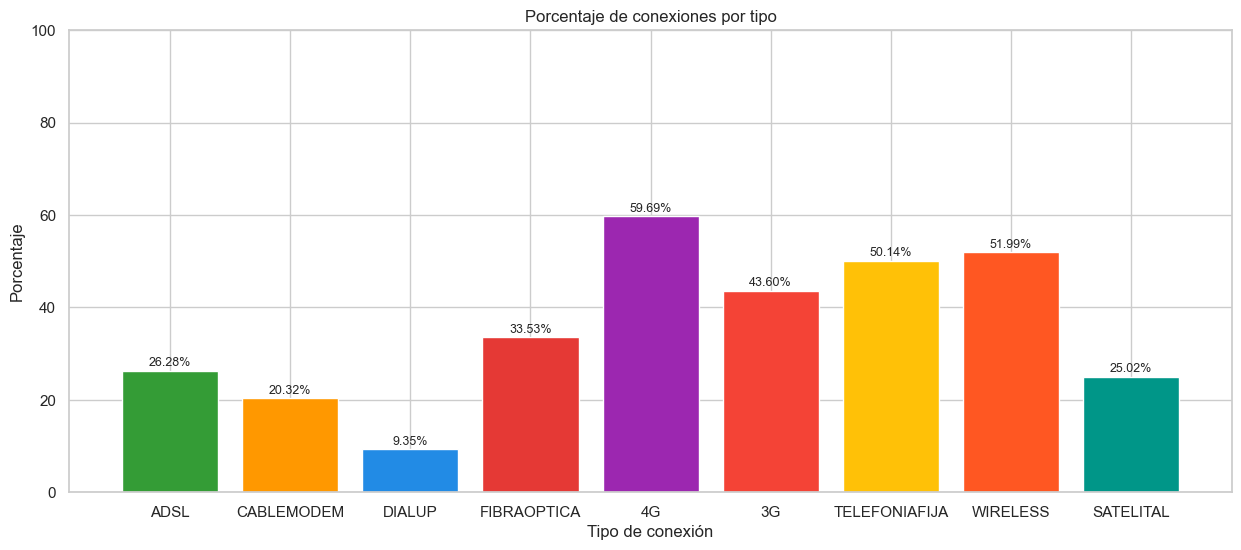

In [553]:
# Calcular el porcentaje de cada columna
porcentaje_adsl = dataset15['ADSL'].mean() * 100
porcentaje_cablemodem = dataset15['CABLEMODEM'].mean() * 100
porcentaje_dialup = dataset15['DIALUP'].mean() * 100
porcentaje_fibraoptica = dataset15['FIBRAOPTICA'].mean() * 100
porcentaje_4g = dataset15['4G'].mean() * 100
porcentaje_3g = dataset15['3G'].mean() * 100
porcentaje_telefoniafija = dataset15['TELEFONIAFIJA'].mean() * 100
porcentaje_wireless = dataset15['WIRELESS'].mean() * 100
porcentaje_satelital = dataset15['SATELITAL'].mean() * 100

plt.figure(figsize=(15, 6))
plt.bar(['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL'],
        [porcentaje_adsl, porcentaje_cablemodem, porcentaje_dialup, porcentaje_fibraoptica, porcentaje_4g,
         porcentaje_3g, porcentaje_telefoniafija, porcentaje_wireless, porcentaje_satelital],
        color=['#349C36', '#FF9800', '#228BE5', '#E53935', '#9C27B0', '#F44336', '#FFC107', '#FF5722', '#009688'])

plt.title('Porcentaje de conexiones por tipo')
plt.xlabel('Tipo de conexión')
plt.ylabel('Porcentaje')

for i, porcentaje in enumerate([porcentaje_adsl, porcentaje_cablemodem, porcentaje_dialup, porcentaje_fibraoptica,
                                porcentaje_4g, porcentaje_3g, porcentaje_telefoniafija, porcentaje_wireless,
                                porcentaje_satelital]):
    plt.text(i, porcentaje + 1, f'{porcentaje:.2f}%', ha='center', fontsize=9)

# Mostrar gráfico
plt.show()




En cuanto a Argentina, la tecnología 5G también promete una conexión ultrarrápida, baja latencia y la capacidad de conectar una amplia gama de dispositivos. Sus ventajas incluyen una mayor velocidad de descarga y carga, una mayor capacidad de red y un mejor rendimiento en aplicaciones de alta demanda, como realidad virtual y conducción autónoma. Sin embargo, existen desafíos asociados con el despliegue del 5G, como la necesidad de una infraestructura más densa y la preocupación por la radiación electromagnética.

En conclusión, en Argentina, la fibra óptica se destaca como una de las conexiones más avanzadas y de mejor rendimiento, seguida de cerca por el 4G y la conexión inalámbrica. La elección de una conexión dependerá de las necesidades individuales y de la disponibilidad en cada localidad. Si bien la adopción del 5G en Argentina presenta grandes promesas, también plantea desafíos que deben abordarse de manera adecuada para aprovechar al máximo su potencial en el país.